In [1]:
import pandas as pd

In [2]:
ship=pd.read_csv("ship.csv")

In [3]:
ship.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
ship.shape

(891, 12)

In [5]:
ship.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [6]:
# without over or undersampling

In [7]:
# can we check if passenger class is impacting chance of survival
 
# exploratory data analysis

from matplotlib import pyplot as plt, style
import seaborn as sns

In [8]:
style.use('seaborn')  #could also be ggplot

In [9]:
# want to see if passenger class impacts survival
# Will gender impact survival?

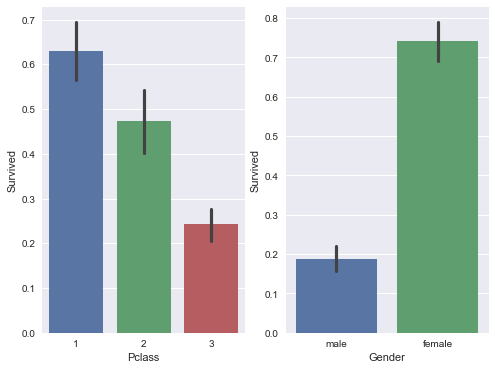

In [10]:
plt.figure(figsize=(8, 6))
plt.subplot(1,2,1)
sns.barplot(data=ship, x='Pclass', y='Survived')
plt.subplot(1,2,2)
sns.barplot(data=ship, x='Gender', y='Survived')
plt.show()

In [11]:
# lower classes have less chance of survival 

# Women more likely to survive

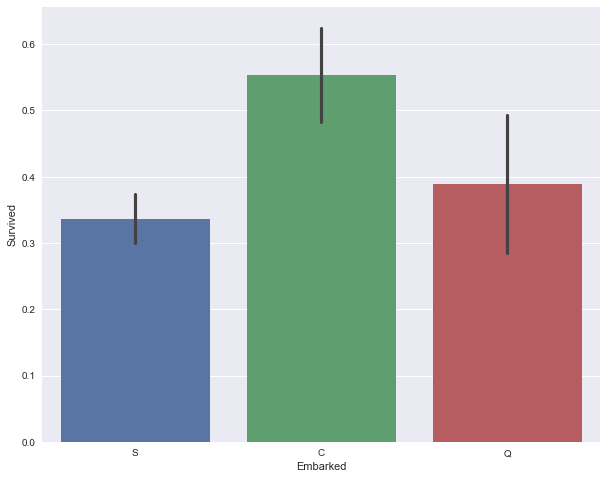

In [12]:
# could where people got on the boat impact their chance of survival?

plt.figure(figsize=(10, 8))
sns.barplot(data=ship, x='Embarked', y='Survived')
plt.show()

In [13]:
# We wouldn't expect place they joined the ship to impact, however some ports could be closer 
# to richer areas, and therefore may be in higher classes which we know had an impact on survival

In [14]:
# can see how much influence they had on each other with cross tab

In [15]:
pd.crosstab(ship.Embarked, ship.Pclass, margins=True) # margins = true gives total

Pclass,1,2,3,All
Embarked,,,,
C,85,17,66,168
Q,2,3,72,77
S,127,164,353,644
All,214,184,491,889


<AxesSubplot:xlabel='Embarked'>

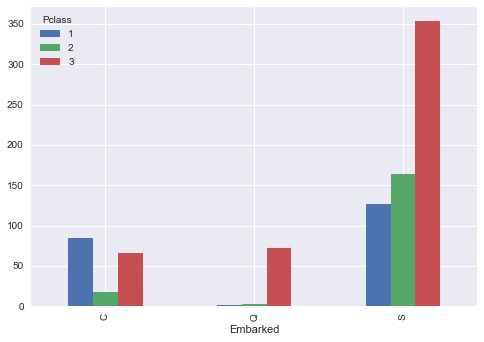

In [16]:
pd.crosstab(ship.Embarked, ship.Pclass).plot(kind='bar')

In [17]:
# does age impact survival?

In [18]:
ageYes = ship[ship.Survived==1]['Age']
ageNo = ship[ship.Survived==0]['Age']

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


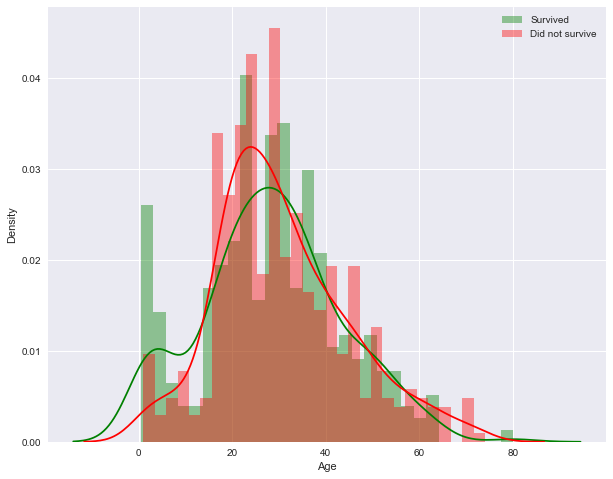

In [23]:
plt.figure(figsize=(10, 8))
sns.distplot(ageYes, label = 'Survived', color='green', bins = 30)
sns.distplot(ageNo, label = 'Did not survive', color = 'red', bins = 30)
plt.legend()
plt.show()

In [24]:
# check if there are missing values

<AxesSubplot:>

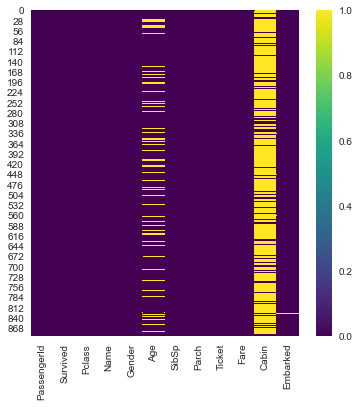

In [25]:
plt.figure(figsize=(6, 6))
sns.heatmap(ship.isna(), cmap='viridis')

In [26]:
# this shows we have lots of missing data for cabin

In [27]:
ship.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Gender           0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [28]:
# as a percentage 

(ship.isna().sum()/ship.shape[0])*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Gender          0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [29]:
# cabin has lots of missing values, so we can drop the column

In [30]:
# can also drop passenger ID, not necesary, 

# can fill age na values with mean or median

In [31]:
ship.Age.agg(['mean', 'median'])

mean      29.699118
median    28.000000
Name: Age, dtype: float64

In [32]:
ship[ship.Age.isna()==True]  # these are the records we want to substitute for the 
# mean or median age

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [33]:
def extractTitle(passengerName):
    return(passengerName.split(",")[1].split(".")[0].strip())

In [34]:
extractTitle("Musk, Mr. Elon")

'Mr'

In [35]:
ship['Title']=ship.Name.apply(extractTitle)
ship.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr


In [36]:
ship.groupby('Title')['Age'].agg(['mean', 'median', 'count'])  # group by title, and 
# find mean and med ages

,mean,median,count
Title,,,
Capt,70.000000,70.0,1
Col,58.000000,58.0,2
Don,40.000000,40.0,1
Dr,42.000000,46.5,6
Jonkheer,38.000000,38.0,1
Lady,48.000000,48.0,1
Major,48.500000,48.5,2
Master,4.574167,3.5,36
Miss,21.773973,21.0,146


In [37]:
ship['Age']=ship.groupby('Title').Age.apply(lambda x:x.fillna(x.median())) # x is the column, 
# apply the median to the na values in x

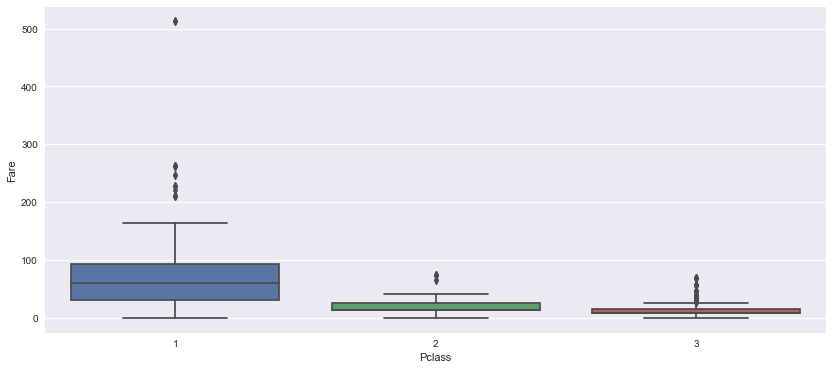

In [41]:
plt.figure(figsize=(14,6))
sns.boxplot(data=ship,x='Pclass',y='Fare')
plt.show()

In [42]:
# drop columns which are not significant 


ship.drop(columns=['PassengerId', 'Name', 'Ticket', 'Cabin', 'Title' ],inplace = True)

KeyError: "['PassengerId' 'Name' 'Ticket' 'Cabin' 'Title'] not found in axis"

In [39]:
ship.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [40]:
ship.isna().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    2
dtype: int64

In [77]:
ship.dropna(subset=['Embarked'], inplace=True)
ship.isna().sum()

Survived    0
Pclass      0
Gender      0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [81]:
ship.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [78]:
ship_dummy=pd.get_dummies(ship, columns=['Pclass', 'Gender', 'Embarked'], drop_first=True)

In [80]:
ship_dummy.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Gender_male,Embarked_Q,Embarked_S
0,0,22.0,1,0,7.2500,0,1,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,1,0,0,1
3,1,35.0,1,0,53.1000,0,0,0,0,1
4,0,35.0,0,0,8.0500,0,1,1,0,1


In [ ]:
# Make model for surviving

In [88]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [89]:
x = ship_dummy.iloc[:, 1:10]  # or could have done ship_dummy.drop(columns='Survived')
y = ship_dummy.Survived

In [102]:
# split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
x_train

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Gender_male,Embarked_Q,Embarked_S
364,30.0,1,0,15.5000,0,1,1,1,0
256,35.0,0,0,79.2000,0,0,0,0,0
477,29.0,1,0,7.0458,0,1,1,0,1
272,41.0,0,1,19.5000,1,0,0,0,1
554,22.0,0,0,7.7750,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
837,30.0,0,0,8.0500,0,1,1,0,1
193,3.0,1,1,26.0000,1,0,1,0,1
630,80.0,0,0,30.0000,0,0,1,0,1
560,30.0,0,0,7.7500,0,1,1,1,0


In [109]:
# standardise the data

from sklearn.preprocessing import StandardScaler


stdsc = StandardScaler()
stdsc.fit(x_train)
x_train_std = stdsc.transform(x_train)
x_test_std = stdsc.transform(x_test)

In [105]:
model = LogisticRegression()

In [106]:
model.fit(x_train_std, y_train)

LogisticRegression()

In [108]:
# check score

print("Train score: ", model. score(x_train_std,y_train))

print("Test score: ", model. score(x_test_std,y_test))

Train score:  0.8284106891701828
Test score:  0.7247191011235955


# Second bit, Shiptest dataset

In [91]:
# import shiptest

shiptest = pd.read_csv("shiptest.csv")

In [92]:
shiptest.head()

,PassengerId,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [94]:
 # now need to clean data, fill nas, remove empty columns etc. 

    


In [ ]:
def fetchTitle(text): 
    if '.' in text:
        return(text.split(',')[1].split('.')[0].strip()) 
    else:
        return('Not Found')
    
def cleanDF(data):
    df=data.copy() 
#create title column 
    df['title']=df.Name.apply(fetchTitle)
    
# substitute missing values 
    df['Age']=df.groupby('title').Age.apply(lambda x:x.fillna(x.median())) 
    df['Fare']=df.groupby('Pclass').Fare.apply(lambda x:x.fillna(x.median()))
    
# dropping columns based on features in model 
    df.drop (columns=['PassengerId', 'Name', 'Ticket', 'title', 'Cabin'],inplace=True) 
    df=pd.get_dummies (data=df,columns=['Pclass', 'Gender', 'Embarked'], drop_first=True) 
    return(df)

# Classification and Clustering

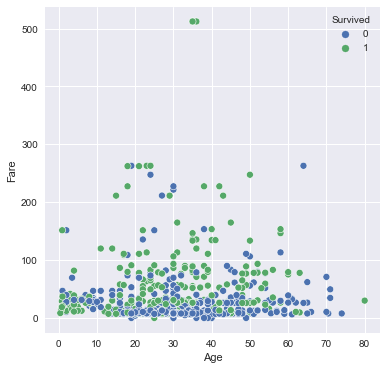

In [96]:
# looking at KNN with ship data

# e.g. age, fare on survival

plt.figure(figsize=(6,6))
sns.scatterplot(data=ship, x='Age', y='Fare', hue='Survived')
plt.show()

In [99]:
from sklearn.neighbors import KNeighborsClassifier

In [112]:
knn = KNeighborsClassifier(n_neighbors=3)

In [113]:
knn.fit(x_train_std, y_train)


KNeighborsClassifier(n_neighbors=3)

In [114]:
print("Train score: ", knn.score(x_train_std, y_train))

print("Test Score: ", knn.score(x_test_std, y_test))

Train score:  0.8874824191279888
Test Score:  0.6853932584269663


In [115]:
# Need to find the optimal number of neighbours

In [119]:
train_accuracy=[]
test_accuracy=[]
for i in range(1, 40):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_std, y_train)
    train_accuracy.append(knn.score(x_train_std, y_train))
    test_accuracy.append(knn.score(x_test_std, y_test))

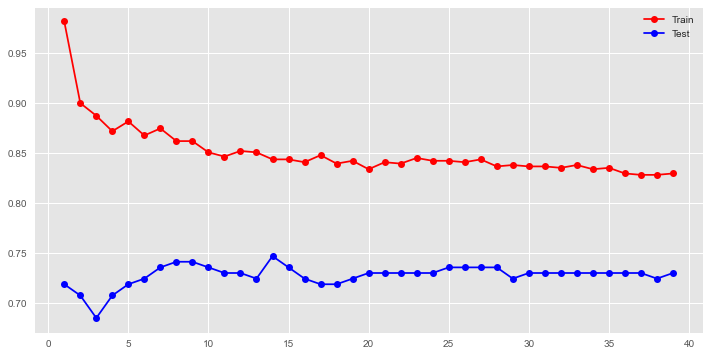

In [121]:
style.use("ggplot")

plt.figure(figsize=(12,6))
plt.plot(range(1,40), train_accuracy, label="Train", color="red", marker="o")
plt.plot(range(1,40), test_accuracy, label="Test", color="blue", marker="o")
plt.legend()
plt.show()

In [123]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 39,
 'p': 2,
 'weights': 'uniform'}

In [124]:
# Store the model

In [125]:
import joblib

In [126]:
joblib.dump(stdsc, "ShipStandardisationModel.h5")

['ShipStandardisationModel.h5']

In [127]:
joblib.dump(knn, "Shipknn.h5")

['Shipknn.h5']

In [128]:
# models stored, can now apply to other datasets